# **Lab 7 : Clustering Part 2**

Types of Clustering:
1. Density Based Clustering (ex. *DBSCAN*)
2. Partition Based Clustering (ex. *Fuzzy C-Means*, k-Means)
3. Hierarchial Clustering (ex. *Agglomerative*, Divisive)
4. Model Based Clustering (ex. GMM)

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

# DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



### A. **Generate "N" spherical training data points.**


General form for points on a circle: 
$$(x, y) = (rcos\theta, rsin\theta)$$
For n such points, i<sup>th</sup> point would have $ \theta = \frac{2 \pi i}{n} $ , i = 0, 1, 2, 3, ... n-1

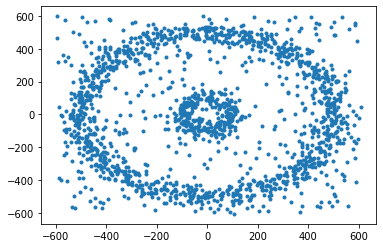

In [5]:
## write your code here
def circularData(radius, noise, n):
    dataset = []
    for i in range(n):
        x = math.cos(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        y = math.sin(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        dataset.append((x, y))
    return dataset

def uniformNoise(bound, n):
    dataset = []
    for i in range(n):
        x = np.random.uniform(-bound, bound)
        y = np.random.uniform(-bound, bound)
        dataset.append((x, y))
    return dataset

outerC = circularData(500, 35, 1000)
innerC = circularData(100, 25, 250)
noisyPts = uniformNoise(600, 400)

plt.figure()
data = pd.DataFrame(outerC)
data = data.append(innerC)
data = data.append(noisyPts)
plt.plot(data[0], data[1], '.')
plt.show()

### B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

[ 1.  1.  1. ... -1.  3. -1.]


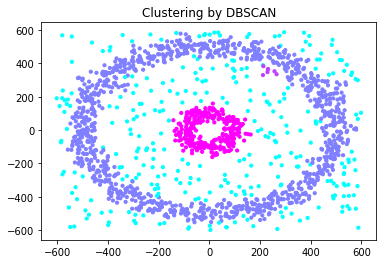

In [23]:
## Write your code here

eps = 30
minpts = 5
x = np.array(data)

def getNeighbours(x, i, eps):
    neighbours = []
    for j in range(0, len(x)):
        # If d<eps , add it to the neighbors list.
        if np.linalg.norm(x[i] - x[j]) < eps:
           neighbours.append(j)
    return neighbours

def populateCluster(x, seed, labels, cluster_id, neighbours, eps, minpts):
    labels[seed] = cluster_id
    i = 0
    while i < len(neighbours):              # sort of Breadth-First-Search
        j = neighbours[i]
        if labels[j] == -1:                 # was earlier labelled as noise
            labels[j] = cluster_id
        elif labels[j] == 0:                # undiscovered point
            labels[j] = cluster_id 
            jNeighbours = getNeighbours(x, j, eps)
            if len(jNeighbours) >= minpts:  # else it's a border point!
                neighbours = neighbours + jNeighbours 
        i = i + 1

def MyDBSCAN(eps, minpts, x):
    labels = np.zeros((x.shape[0]))
    # print(labels)
    cluster_id = 0
    for i in range(len(x)):
        if labels[i] != 0:
            continue
        neighbours = getNeighbours(x, i, eps)
        if len(neighbours) < minpts:
            labels[i] = -1         # noise:-1, not considered:0
        else:
            cluster_id = cluster_id + 1
            populateCluster(x, i, labels, cluster_id, neighbours, eps, minpts)
    return labels

# function call
pred_labels = MyDBSCAN(eps, minpts, x)

print(pred_labels)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=pred_labels, s=10, cmap = 'cool');
plt.title("Clustering by DBSCAN")
plt.show()

### C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

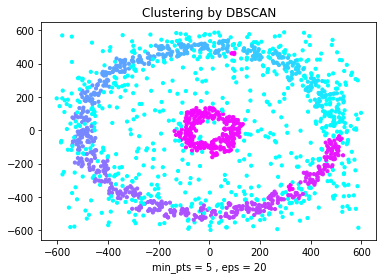

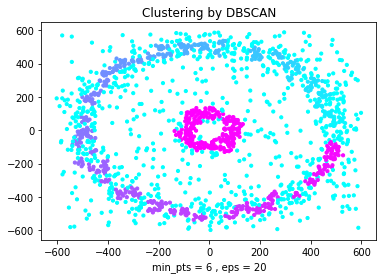

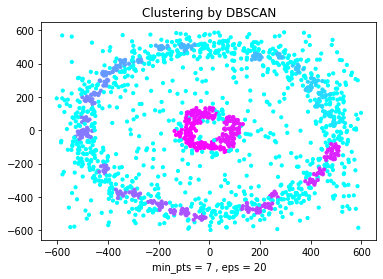

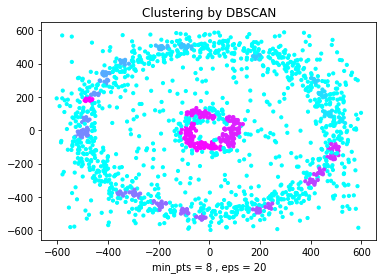

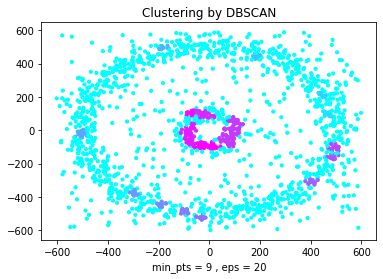

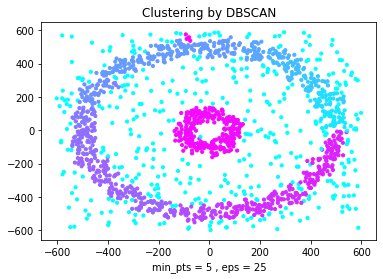

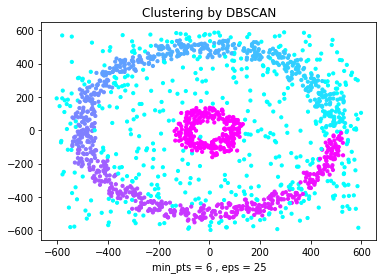

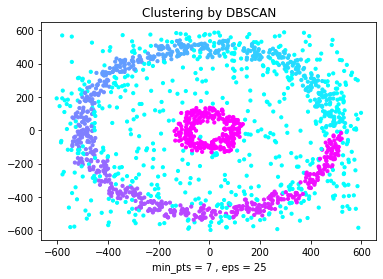

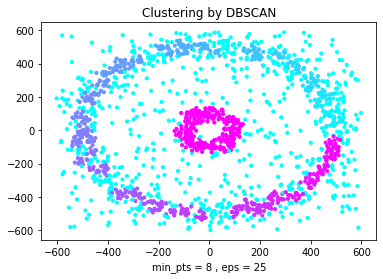

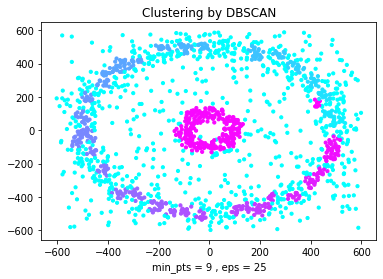

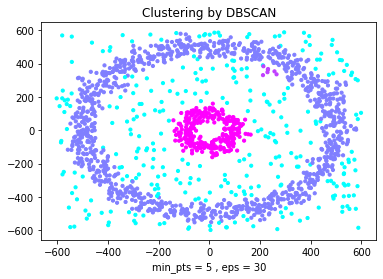

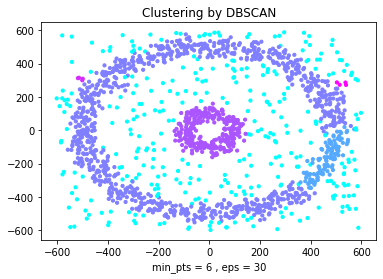

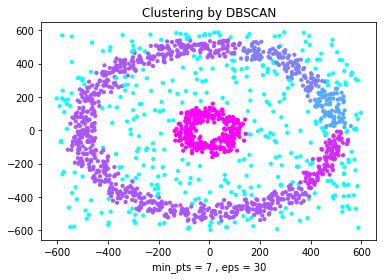

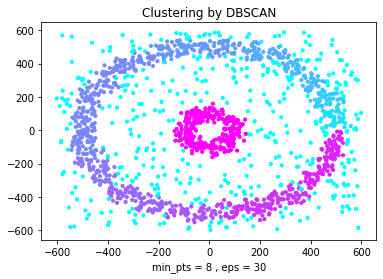

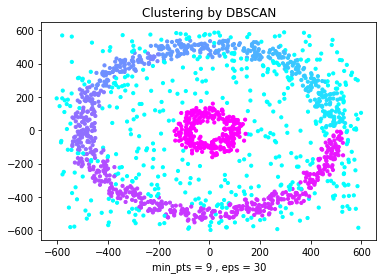

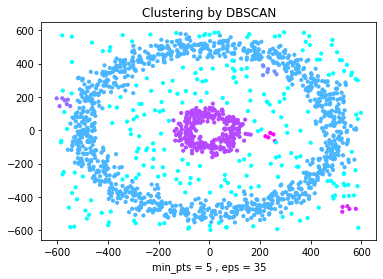

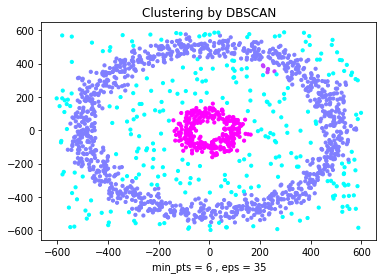

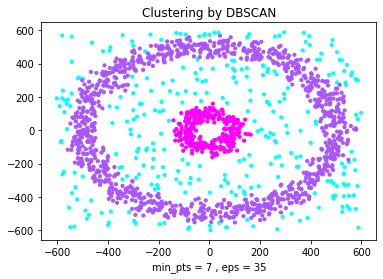

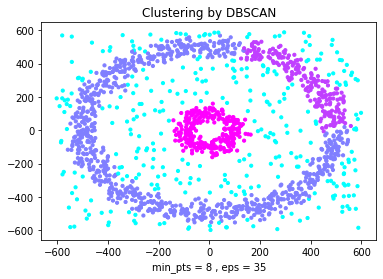

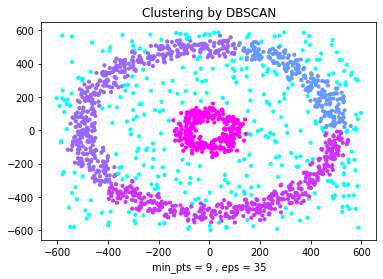

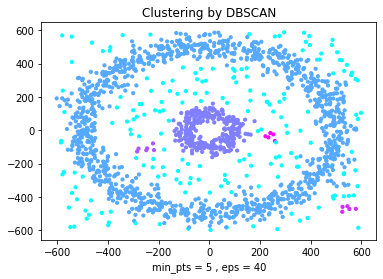

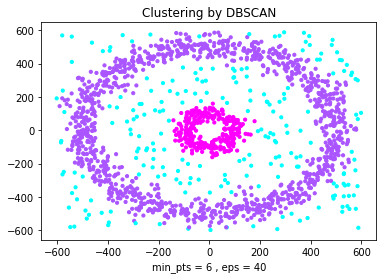

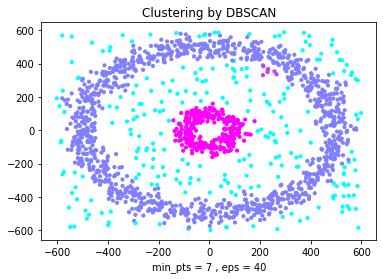

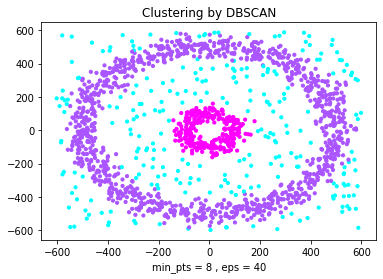

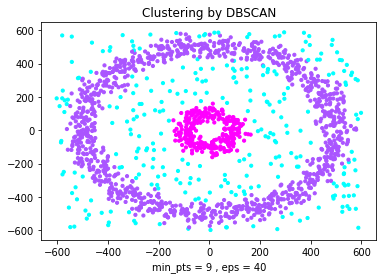

In [27]:
## write your code here
min_pts = [5, 6, 7, 8, 9]
eps_rad = [20, 25, 30, 35, 40]
for i in eps_rad:
    for j in min_pts:
        plabels = MyDBSCAN(i, j, x)
        plt.figure()
        plt.scatter(x[:,0], x[:,1], c=plabels, s=10, cmap = 'cool');
        plt.title("Clustering by DBSCAN")
        plt.xlabel("min_pts = "+str(j)+" , eps = "+str(i))
        plt.show()


### D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

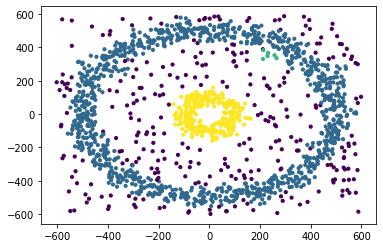

In [28]:
from sklearn.cluster import DBSCAN
## write your code here
dBSCAN = DBSCAN(eps=30, min_samples=5).fit(x)
labels = dBSCAN.labels_
plt.figure()
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)
plt.show()

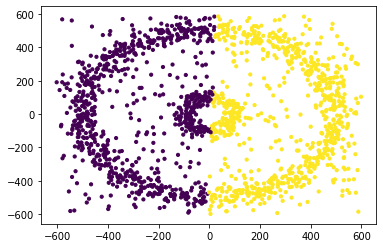

In [30]:
########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
gaussMix = GaussianMixture(n_components=2, random_state=0).fit(x)
labels = gaussMix.predict(x)
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)



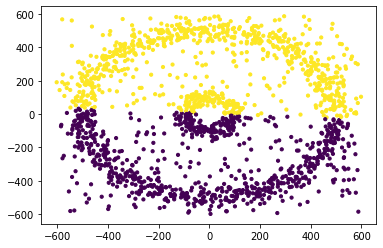

In [33]:
########################################################################
from sklearn.cluster import KMeans
## write your code here
kMeans = KMeans(n_clusters=2, random_state=0).fit(x)
y = kMeans.fit_predict(x)
labels = kMeans.predict(x)
plt.scatter(x[:,0], x[:,1], s=10, c=labels)

# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of membership of all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

Iteration  0


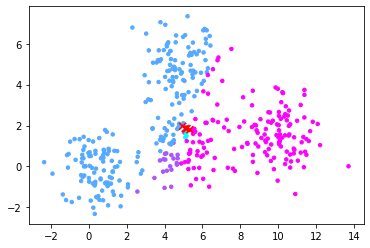

Iteration  1


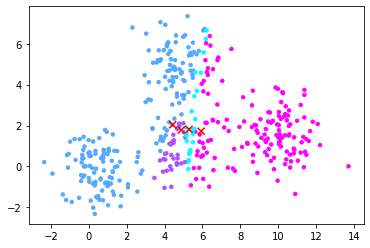

Iteration  2


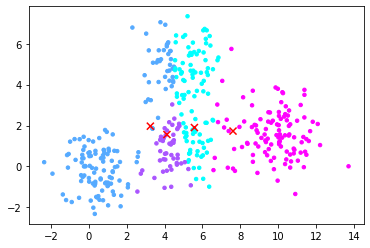

Iteration  3


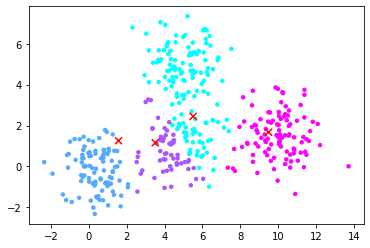

Iteration  4


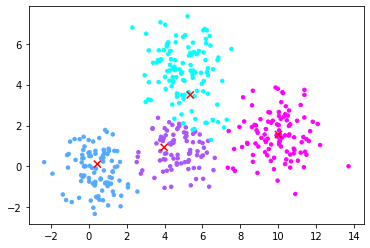

Iteration  5


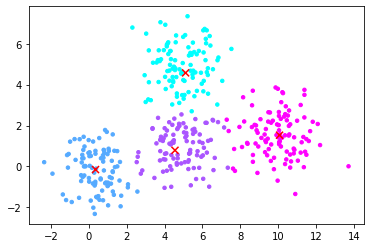

Iteration  6


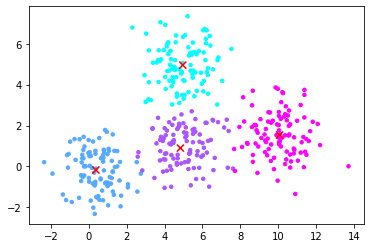

Iteration  7


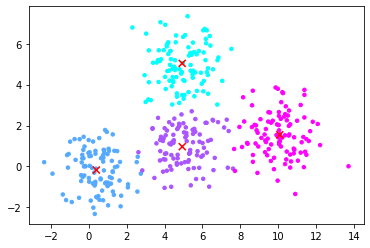

Iteration  8


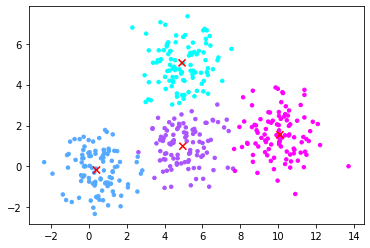

Iteration  9


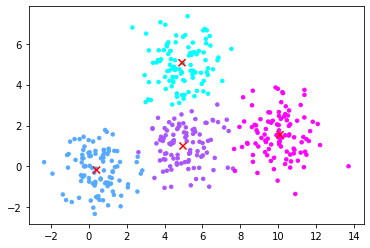

Iteration  10


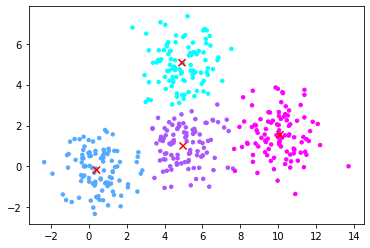

Final Clustering:


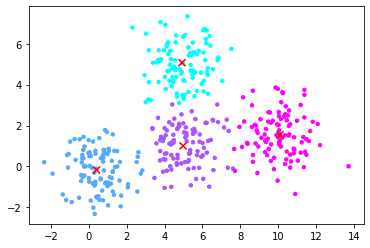

In [7]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt


d1 = np.random.multivariate_normal((0.5, 0.0), np.identity(2), 100)
d2 = np.random.multivariate_normal((5.0, 5.0), np.identity(2), 100)
d3 = np.random.multivariate_normal((5.0, 1.0), np.identity(2), 100)
d4 = np.random.multivariate_normal((10.0, 1.5), np.identity(2), 100)
zeroarr = np.zeros(100)
onearr = np.ones(100)
twoarr = 2*onearr
threearr = 3*onearr
# concatenate all this to form an unlabelled dataset
real_labels = np.concatenate((zeroarr, onearr, twoarr, threearr))
data = np.concatenate((d1,d2,d3,d4))

class FuzzyC:
    # func for euclidean distance
    def dist(self, a, b):
        d = (a[1] - b[1])**2 + (a[0] - b[0])**2
        return d

    # initialization parameters
    def __init__(self, c, data):
        self.data = data
        self.b = 2              # fuzzification parameter
        self.n = len(data)
        self.c = c
        self.p = len(data[0])   # num of features
        self.max_iter = 100

    # initialize the membership matrix
    def initialize_membership_matrix(self, n, c):
        mem_mat = list()
        # generate c random numbers in [0,1), sum them and divide (w.r.t. each point)
        for i in range(n):
            random_list = [random.random() for x in range(c)]
            summation = sum(random_list)
            for i in range(len(random_list)):
                random_list[i] = random_list[i]/summation
            mem_mat.append(random_list)
        return mem_mat
    
    # update centroids 
    # (can also be used for cluster initialization, since we let mem matrix be random)
    def update_centroid(self, mem_mat):
        data = self.data
        centroids = {}
        for j in range(self.c):                                 # consider jth cluster
            temp = []
            for k in range(self.p):                             # w.r.t each feature
                num = 0
                for i in range(self.n):                         # sum(x * p^b)
                    num = num + (mem_mat[i][j]**self.b)*(data[i][k])
                den = 0
                for i in range(self.n):                         # get sum(p^b)
                    den = den + mem_mat[i][j]**self.b
                val = num/den
                temp.append(val)
            centroids[j] = temp
        return centroids

    # update membership matrix
    def update_membership_matrix(self, mem_mat,centroids):
        data = self.data
        for i in range(self.n):
            distances = list()
            for j in range(self.c):
                distances.append(self.dist(data[i],centroids[j])) # distance of point i from each centroid
            for j in range(self.c):
                den = sum([math.pow(float(distances[j]/distances[q]), float(2/(self.b-1))) for q in range(self.c)]) # relative distance from each centroid
                mem_mat[i][j] = float(1/den)
        return mem_mat

    # labelling based on final clustering
    def find_cluster(self,mem_mat):
        clusters = list()
        for i in range(self.n):
            max_val, idx = max((val, ind) for (ind, val) in enumerate(mem_mat[i]))
            clusters.append(idx)
        return clusters
    
    # check if membership matrix isn't changing much
    def check(self,prev_mat,mem_mat):
        diff = 0
        for i in range(self.n):
            for j in range(self.c):
                diff = diff + np.abs(prev_mat[i][j] - mem_mat[i][j])
        if(diff<0.01):
            return True
        return False
    
    # main thing here!!!!!
    def fuzzy_c_mean(self):
        mem_mat = self.initialize_membership_matrix(self.n,self.c)
        for i in range(self.max_iter):
            centroids = self.update_centroid(mem_mat)
            prev_mat = mem_mat
            mem_mat = self.update_membership_matrix(mem_mat,centroids)
            cluster = self.find_cluster(mem_mat)
            if i<=10:
                self.showGraphs(cluster, centroids, i)
            # self.showGraphs(cluster, centroids, i)
            if(self.check(prev_mat,mem_mat))<0.01:
                print(i)
                break
        return cluster,centroids
    
    def showGraphs(self, clusters, centroids, i):
        print("Iteration ",i)
        plt.figure()
        plt.scatter(self.data[:,0], self.data[:,1], c=clusters, s=12, cmap="cool")
        x = []
        y = []
        for i in range(len(centroids)):
            cent = centroids[i]
            x.append(cent[0])
            y.append(cent[1])
        plt.scatter(x, y, marker='x', color='r', s=50*np.ones(len(centroids))) 
        plt.show()
        

fcm = FuzzyC(4, data)
clusters, centroids = fcm.fuzzy_c_mean()
x = []
y = []
for i in range(len(centroids)):
    cent = centroids[i]
    x.append(cent[0])
    y.append(cent[1])

print("Final Clustering:")
plt.figure()
plt.scatter(data[:,0], data[:,1], c=clusters, s=12, cmap="cool")
plt.scatter(x, y, marker='x', color='r', s=50*np.ones(len(centroids)))
plt.show()



# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [21]:
from cmath import inf

def Euclidean_Dist(x,y):
  return ((x[0]-y[0])**2+(x[1]-y[1])**2)*0.5

def Dist_mat(X):
 ## write your code here
  dist_mat = np.empty(shape=(X.shape[0],X.shape[0]))
  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      dist_mat[i][j] = Euclidean_Dist(X[i,:],X[j,:])    # set distances between clusters
  for i in range(X.shape[0]):                           # set diag to inf
    dist_mat[i][i] = inf
  return dist_mat

def combine(X,cluster):
  dist_mat = Dist_mat(X=X)
  points = np.where(dist_mat == np.amin(dist_mat))[0]   # get clusters w min distance
  xl = points[0]
  xm = points[1]
  if(xl > xm):                                      # swap so minx <= miny
    xl, xm = xm, xl
  cluster.append([xl, xm])
  X[xl] = 0.5*(X[xl] + X[xm])                       # replace x_min(l,m) with 0.5*(xl, xm)
  X = np.delete(X, xm, 0)                           # delete row corresponding to x_max(l,m)
  return X, cluster

In [20]:
%pip install plotly

You should consider upgrading via the 'c:\Users\bsidd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
X = np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
import plotly.figure_factory as ff
## write your code here
cluster = []
print(X)
while X.shape != (1,2): # end if X has just 2 clusters left
  X1 = X.transpose()
  lab = np.linspace(1, X1.shape[1], X1.shape[1])
  fig = ff.create_dendrogram(X1.T, labels = lab)
  fig.update_layout(width=800, height=300)
  fig.show()
  X,cluster = combine(X,cluster)
  print("Combined Points", cluster[-1] + np.ones((1,2)))


  print('\nMean of clusters after every iteration: \n\n',X)
print('\ncluster combination order: \n\n',cluster + np.ones((len(cluster),2)))

## validate from inbuilt Dendogram

[[1.  1. ]
 [2.  1. ]
 [5.  4. ]
 [6.  5. ]
 [6.5 6. ]]


Combined Points [[1. 2.]]

Mean of clusters after every iteration: 

 [[1.5 1. ]
 [5.  4. ]
 [6.  5. ]
 [6.5 6. ]]


Combined Points [[3. 4.]]

Mean of clusters after every iteration: 

 [[1.5  1.  ]
 [5.   4.  ]
 [6.25 5.5 ]]


Combined Points [[2. 3.]]

Mean of clusters after every iteration: 

 [[1.5   1.   ]
 [5.625 4.75 ]]


Combined Points [[1. 2.]]

Mean of clusters after every iteration: 

 [[3.5625 2.875 ]]

cluster combination order: 

 [[1. 2.]
 [3. 4.]
 [2. 3.]
 [1. 2.]]


You should consider upgrading via the 'c:\Users\bsidd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 15.2/15.2 MB 4.5 MB/s eta 0:00:00


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [9]:
%pip install idx2numpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for idx2numpy, since package 'wheel' is not installed.
  Running setup.py install for idx2numpy: started
  Running setup.py install for idx2numpy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bsidd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


(1954, 784)


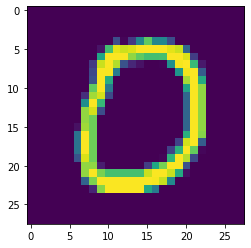

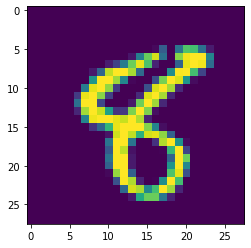

In [18]:
import idx2numpy
# from keras.utils import np_utils
img_path = "t10k-images-idx3-ubyte" ## write your code here
label_path = "t10k-labels-idx1-ubyte" ## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here
id_0 = np.where(labels==0)
id0 = id_0[0]
Im_0 = Images[id0,:,:]
label_0=labels[id0]
plt.figure()
plt.imshow(Im_0[1,:,:])

id_8=np.where(labels==8)
id8=id_8[0]
Im_8=Images[id8,:,:]
label_8=labels[id8]
plt.figure()
plt.imshow(Im_8[1,:,:])

data=np.concatenate((Im_0, Im_8))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
y=np.concatenate((label_0, label_8))
print(data.shape)

Use the K-means clustering algorithm from the last lab to form the clusters

Initialization complete
Iteration 0, inertia 10569376621.0
Iteration 1, inertia 6027558060.99791
Iteration 2, inertia 5948722623.144613
Iteration 3, inertia 5946248218.593399
Iteration 4, inertia 5946185599.385244
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 11984286835.0
Iteration 1, inertia 6823503613.92376
Iteration 2, inertia 6649751605.540089
Iteration 3, inertia 6290397494.620843
Iteration 4, inertia 5990593254.258571
Iteration 5, inertia 5955393779.2508135
Iteration 6, inertia 5948976094.530472
Iteration 7, inertia 5947108351.10419
Iteration 8, inertia 5946423579.1520195
Iteration 9, inertia 5946256719.009511
Iteration 10, inertia 5946185599.385244
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 10722176791.0
Iteration 1, inertia 6097476521.307847
Iteration 2, inertia 6002977891.074748
Iteration 3, inertia 5968607097.054088
Iteration 4, inertia 5955291322.269452
Iteration 5, inertia 5949077

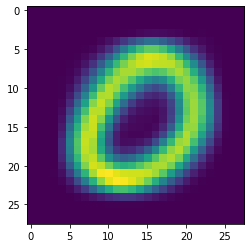

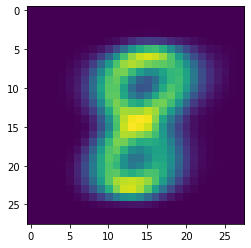

In [23]:
## Write your code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=100, max_iter=100, verbose=1)
kmeans.fit(data)

cents = kmeans.cluster_centers_
im = np.reshape(cents[0,:], (28,28))
plt.figure()
plt.imshow(im)

im = np.reshape(cents[1,:], (28,28))
plt.figure()
plt.imshow(im)


In [24]:
from sklearn import metrics

pred_lab = kmeans.predict(data)
# print(pred_lab)
print('performance=',metrics.homogeneity_score(pred_lab, y))

performance= 0.7387783429447129


Use the GMM clustering algorithm from the last lab to form the clusters

Initialization 0
  Iteration 10
Initialization converged: True


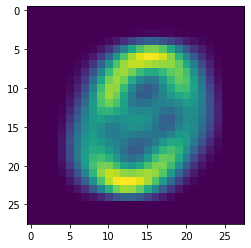

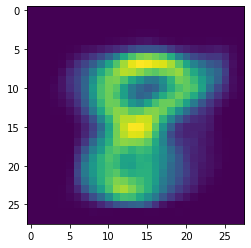

In [25]:
## Write your code here
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)
gauss.fit(data)
gauss.get_params(deep=True)

means = gauss.means_
vars = gauss.covariances_
weights = gauss.weights_

im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)


In [26]:
pred_lab = gauss.predict(data)
print(pred_lab)
print('performance=',metrics.homogeneity_score(pred_lab, y))

[0 0 0 ... 0 0 0]
performance= 0.1213186660952875
